In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
house_df = pd.read_csv("kc_house_data.csv")
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# 가격 기준으로 집 범주화

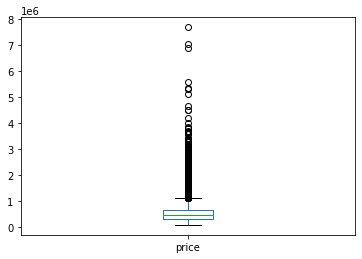

In [3]:
house_df.plot(kind='box', y='price')
plt.show()

In [4]:
house_df.price.describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [5]:
def categorize(price):
    if price <= 300000:
        return "1"
    elif price > 450000 and price <= 700000:
        return "2"
    elif price > 2000000 and price <= 3500000:
        return "3"
    elif price > 4000000:
        return "4"
    else:
        return None
    
house_df["price_category"] = house_df["price"].apply(categorize)

In [6]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


# 구글맵에 가격별로 플로팅

In [7]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.layouts import layout
from bokeh.plotting import gmap
from bokeh.models.widgets import RadioGroup

In [8]:
def bkapp(doc):
    APIkey = ""  ## 구글맵 API를 발급받으세요.
    map_options = GMapOptions(lat=47.5480, lng=-121.9836, map_type="roadmap", zoom=10)

    plot = gmap(APIkey, map_options, title="King County", width=1000, height=600)

    source = ColumnDataSource(data = {
        "lat": house_df[house_df.price_category == "1"].lat,
        "long": house_df[house_df.price_category == "1"].long
    })

    plot.circle(x="long", y="lat", size=3, fill_color="blue", fill_alpha=0.5, source=source)



    # Define the callback function
    def radio_update(attr, old, new):
        active = radio.active
        categories = ["1", "2", "3", "4"]
        
        source.data = {
            "lat": house_df[house_df.price_category == categories[active]].lat,
            "long": house_df[house_df.price_category == categories[active]].long
        }


    # Create radio button
    radio = RadioGroup(labels=["낮음", "중간", "비쌈", "개비쌈"], active=0)
    radio.on_change("active", radio_update)


    # Application on Jupyter notebook
    doc.add_root(layout([plot, radio], sizing_mode='stretch_width'))

In [9]:
output_notebook()
show(bkapp)

Loading BokehJS ...